In [39]:
from homography import pyrs12, spaces
import os, cv2, h5py, random, string
import numpy as np
import HandShapeAnalysis
import matplotlib.pyplot as plt
import deproject
from functools import reduce
from importlib import reload
import pptk

In [40]:
reload(HandShapeAnalysis)

<module 'HandShapeAnalysis' from 'E:\\User\\workspace\\multi-touch\\notebook\\HandShapeAnalysis.py'>

In [41]:
path = "E:\\User\\workspace\\multi-touch\\recording_data\\2_tap.hdf5"

In [42]:
data = h5py.File(path, 'r')

In [43]:
depth_frame = data['depth'][...]
pcl_center = data['pcl_center'][...]
trans_matrix = data['trans_matrix'][...]

In [44]:
def depth2cloud(image, mat, org, show = False):
    cloud = deproject.compute(image.astype(np.short()))
    point_original = (np.dot(mat, (cloud - org).reshape((-1,3)).T).T)
    # if show: plt.imshow(point[image != 0].reshape((-1,3)))
    return point_original#, point[without_table].reshape((-1,3))

In [45]:
analyser = HandShapeAnalysis.Depth2Finger(pcl_center, trans_matrix)
analyser.set_show(debug=False,finger_point_image=True, hull_image=False, detected_defect=True, cluster_point=False, possibility_modal=False)
analyser.RANSAC = True

[array([[0.01097368, 0.002597  , 0.04227762],
       [0.01027905, 0.00248812, 0.04221248],
       [0.00958399, 0.00237921, 0.04214733],
       ...,
       [0.01586693, 0.00995271, 0.00900428],
       [0.0152672 , 0.00897999, 0.00821757],
       [0.01497801, 0.00578504, 0.00560552]], dtype=float32)
 array([[-0.0249728 , -0.00572319,  0.04402559],
       [-0.02568964, -0.00572917,  0.04403189],
       [-0.02640651, -0.00573518,  0.04403821],
       ...,
       [-0.01873257,  0.00594804,  0.00915422],
       [-0.01948369,  0.0064281 ,  0.00955369],
       [-0.0202062 ,  0.00506115,  0.00845902]], dtype=float32)]
[[ 0.01338019  0.02566342  0.02459451]
 [-0.02803906  0.01976673  0.0285084 ]]


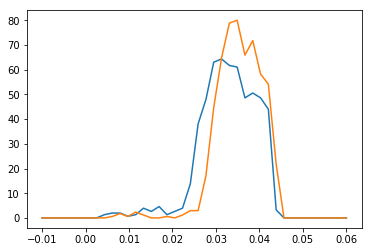

[array([[0.00910951, 0.00040399, 0.04081298],
       [0.00830076, 0.00122817, 0.0413825 ],
       [0.00754332, 0.00163764, 0.04166998],
       ...,
       [0.00989259, 0.01038386, 0.00945629],
       [0.01402326, 0.01290741, 0.01051038],
       [0.01327726, 0.01299738, 0.01059685]], dtype=float32)
 array([[-0.02499716, -0.0043818 ,  0.04234403],
       [-0.02571451, -0.00449238,  0.04228092],
       [-0.02643329, -0.00470758,  0.04214846],
       ...,
       [-0.02321934,  0.01032697,  0.01087559],
       [-0.02395272,  0.00983665,  0.01048651],
       [-0.02469629,  0.00595484,  0.00733118]], dtype=float32)]
[[ 0.01415345  0.02475211  0.02473569]
 [-0.02950705  0.01933084  0.02464123]]


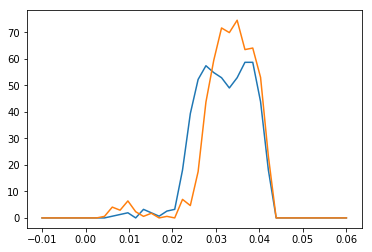

[array([[0.00837879, 0.00128581, 0.03970632],
       [0.00757235, 0.00210733, 0.04027918],
       [0.00682761, 0.00241208, 0.04049745],
       ...,
       [0.01402936, 0.01326687, 0.00985926],
       [0.01325616, 0.01354924, 0.01010553],
       [0.012986  , 0.01017244, 0.00732045]], dtype=float32)
 array([[-0.02431286, -0.0022762 ,  0.04030713],
       [-0.02502802, -0.00207422,  0.04045376],
       [-0.02574276, -0.0019762 ,  0.0405302 ],
       ...,
       [-0.02327584,  0.02796183,  0.02526092],
       [-0.02396158,  0.02785946,  0.02518758],
       [-0.02322035,  0.00602724,  0.00543834]], dtype=float32)]
[[ 0.01217153  0.02515839  0.0224185 ]
 [-0.02813726  0.02118662  0.02251768]]


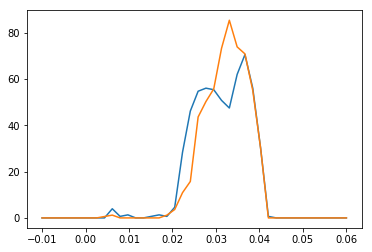

[array([[0.00758409, 0.00200397, 0.04020827],
       [0.00681613, 0.00251544, 0.04056837],
       [0.00606212, 0.00292353, 0.04085753],
       ...,
       [0.01518184, 0.01038476, 0.00745895],
       [0.01404308, 0.01317058, 0.00977948],
       [0.01344455, 0.01220115, 0.0089887 ]], dtype=float32)
 array([[-0.02430469, -0.0027226 ,  0.04086674],
       [-0.02502021, -0.00262441,  0.04094297],
       [-0.02573585, -0.00263035,  0.04094922],
       ...,
       [-0.02327274,  0.02699287,  0.02447051],
       [-0.0239611 ,  0.02689048,  0.02439719],
       [-0.02695096,  0.00419281,  0.00592711]], dtype=float32)]
[[ 0.01157525  0.02481266  0.02124688]
 [-0.03020179  0.02117627  0.02433175]]


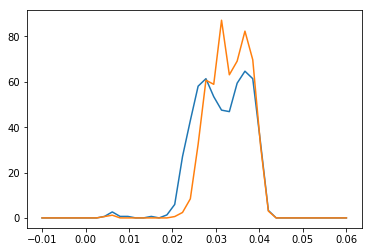

[array([[0.00838485, 0.00050238, 0.04088893],
       [0.00761382, 0.00101553, 0.04124693],
       [0.00685701, 0.00142496, 0.04153441],
       ...,
       [0.0077035 , 0.01017133, 0.00931801],
       [0.00744277, 0.00600938, 0.00591319],
       [0.01235621, 0.00893309, 0.00726896]], dtype=float32)
 array([[-0.02500597, -0.00414365,  0.04164445],
       [-0.02572383, -0.00425406,  0.04158113],
       [-0.02644224, -0.00436449,  0.04151785],
       ...,
       [-0.02247829,  0.00907323,  0.00984193],
       [-0.02469027,  0.00866799,  0.00954416],
       [-0.02545327,  0.00362329,  0.00544053]], dtype=float32)]
[[ 0.01292501  0.02400653  0.02326221]
 [-0.03017586  0.02069816  0.02573314]]


In [50]:
for i in depth_frame[30:35]:
    area, point = analyser.renew_both(i)
    print(area)
    print(point)
    for j in analyser.predict_return(area):
        plt.plot(np.linspace(-0.01, 0.06, 40),j)
    plt.show()